## Hotel Bookings

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Import the pymongo package

import pymongo
from pymongo import MongoClient
import pprint #for pretty printing
import re

In [3]:
#Use MongoClient to connect to the already running mongod server

client = MongoClient('localhost', 27017)

#Database 'project' and dataset 'hotel_booking' being selected
db = client['project']
collection = db['hotel_booking']

doc_iterator = collection.find()

In [4]:
# Counting the number of records
doc_iterator.count()

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


119390

In [5]:
# Check the sample data fields
for doc in collection.find().limit(1):
    pprint.pprint(doc)

{'_id': ObjectId('5e519cd3056ec54ade7eda15'),
 'adr': 0,
 'adults': 2,
 'agent': 'NULL',
 'arrival_date_day_of_month': 1,
 'arrival_date_month': 'July',
 'arrival_date_week_number': 27,
 'arrival_date_year': 2015,
 'assigned_room_type': 'C',
 'babies': 0,
 'booking_changes': 3,
 'children': 0,
 'company': 'NULL',
 'country': 'PRT',
 'customer_type': 'Transient',
 'days_in_waiting_list': 0,
 'deposit_type': 'No Deposit',
 'distribution_channel': 'Direct',
 'hotel': 'Resort Hotel',
 'is_canceled': 0,
 'is_repeated_guest': 0,
 'lead_time': 342,
 'market_segment': 'Direct',
 'meal': 'BB',
 'previous_bookings_not_canceled': 0,
 'previous_cancellations': 0,
 'required_car_parking_spaces': 0,
 'reservation_status': 'Check-Out',
 'reservation_status_date': '2015-07-01',
 'reserved_room_type': 'C',
 'stays_in_week_nights': 0,
 'stays_in_weekend_nights': 0,
 'total_of_special_requests': 0}


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)
from pandas.io.json import json_normalize

In [7]:
# Converting into pandas dataframe
df = json_normalize(list(collection.find()))
df.head(5)
df.shape

,_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,5e519cd3056ec54ade7eda15,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,5e519cd3056ec54ade7eda16,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
2,5e519cd3056ec54ade7eda17,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
3,5e519cd3056ec54ade7eda18,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03
4,5e519cd3056ec54ade7eda19,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02


(119390, 33)

In [8]:
#Checking for null values

df.columns[df.isnull().any()].tolist()
#df.isnull().sum()

[]

In [9]:
#Checking for structure of data frame

df.dtypes

_id                                object
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                           object
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

In [10]:
df = df.loc[df['children'] != 'NA']
df['children'] = df['children'].astype(str).astype(int)

In [11]:
df.shape

(119386, 33)

In [12]:
# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
# rest schould be self-explanatory.
nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
df = df.fillna(nan_replacements)

# # "meal" contains values "Undefined", which is equal to SC.
df["meal"].replace("Undefined", "SC", inplace=True)

# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
# I'm dropping these entries with no guests.
# zero_guests = list(df.loc[df["adults"]
#                    + df["children"]
#                    + df["babies"]==0].index)
# df.drop(df.index[zero_guests], inplace=True)

In [13]:
df.shape

(119386, 33)

In [14]:
for col in df.columns:
    df[col].replace('NULL', 0, inplace = True)
    df[col].replace('NA', 0, inplace = True)
    df[col].replace('', 0, inplace = True)

In [15]:
df.shape

(119386, 33)

D:\Programs\Anaconda\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


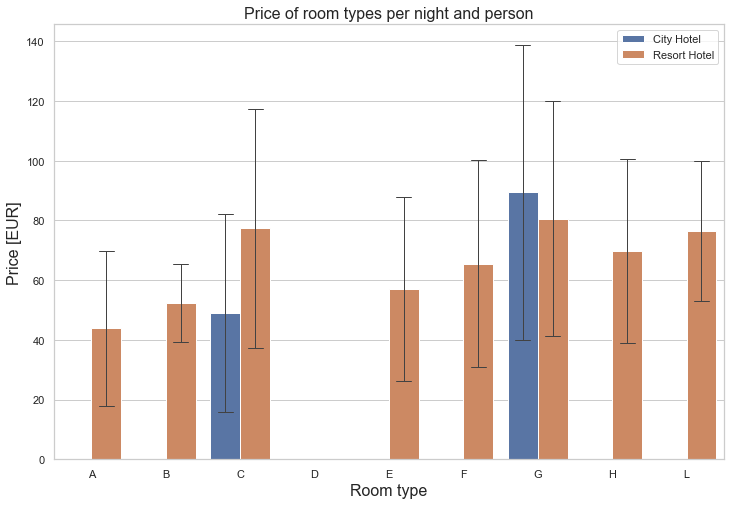

In [16]:
# normalize price per night (adr):
df["adr_pp"] = df["adr"] / (df["adults"])
full_data_guests = df.loc[df["is_canceled"] == 0] # only actual guests
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.barplot(x = "reserved_room_type", y="adr_pp", hue="hotel", data=room_prices, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", errwidth=1, capsize=0.2)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.show();

In [17]:
# for ML:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [18]:
# Separate features and predicted value
y = df["is_canceled"]
X = df.drop(["_id","is_canceled"], axis=1)
# for col in (X.columns):
#     X[col].replace('NULL', 0, inplace=True)


# Divide data into training and validation sets:
# 70 % for training, 30 % for validation
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [19]:
# manually choose columns to include
# some columns make no sense to include (arrival_date_year, assigned_room_type,
# booking_changes, reservation_status, reservation_status)

num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company","days_in_waiting_list",
                "required_car_parking_spaces", "total_of_special_requests",
               "adr"]
 
cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

In [20]:
X_train = X_train_df[num_features + cat_features].copy()
X_test = X_test_df[num_features + cat_features].copy()

# preprocess numerical feats:
# for most num cols, except the dates, 0 is the most logical choice as fill value
# and here no dates are missing.
num_transformer = SimpleImputer(strategy="constant")

# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),('cat', cat_transformer, cat_features)])

In [21]:
# Define model:
model = RandomForestClassifier(random_state=0)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])

# # Preprocessing of training data, fit model:
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions:
preds = my_pipeline.predict(X_test)

# # Evaluate the model:
score = accuracy_score(y_test, preds)
print("\n")
print("accuracy_score:{} % ".format(round(score,2)))

D:\Programs\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0),
                                                  ['lead_time',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_mon



accuracy_score:0.86 % 


#### Reference
https://www.kaggle.com/jessemostipak/hotel-booking-demand/kernels